# SCFHS - Senior Data Scientist

Structure your analysis with the following components:

1. Refine your objective
2. Collect the data (save the data in the directory `data/`)
3. Data Exploration and Data Cleaning
4. Summarize your results
5. List any resource you used
6. Future work and suggestions:

### Yasser Alnakhli

#  1. Refine your objective


### Question


In the Muslim community, people tend to die more (often) in the month of Shaban.True or False?

# 2. Collect the data (Scraping):


### Data Set:

The data is from Medina Municipality. It is up to date deaths reports and it has been collected since 1340 Hijri. The Data is in Arabic, but the deaths date is reported in English numbers following the Hijri Calender which is a lunar calendar consisting of 12 lunar months in a year. Shaban is the 8th months and we will investigate whether this month has highest deaths rate or not.  

### Data Scraping:

From the given [Medina Municipality](https://services.amana-md.gov.sa/eservicesite/Inq/DeathInquiry.aspx) 
Have to scrape the table data and store it as a csv file. Then have to analyze whether death counts more often in the 8th month or not. 

### a. WebScraping using Python

In [1]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import selenium
from selenium import webdriver

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# from selenium import webdriver
# from bs4 import BeautifulSoup
# import pandas as pd



# driver = webdriver.Chrome()
# driver.get("https://services.amana-md.gov.sa/eservicesite/Inq/DeathInquiry.aspx")
# content = driver.current_url
# soup = BeautifulSoup(content,'lxml')
# primary=[]
# for tr in soup.find('table', attrs={'id':'ctl00_ContentPlaceHolder1_dgDeath'}).find_all("tr"):
#     data = [item.get_text(strip=True) for item in tr.find_all(["a"])]
#     primary.append(data)
# dataarray=[]
# for asd in range(1,len(primary)-1):
#      dataarray.append(primary[asd])
# print(dataarray)
# df = pd.DataFrame(ramclvr[asd])
# print (df)
# df.to_csv('dq.csv', index=False, encoding='utf-8')

### b. WebScraping using Google Tools:

Alternative way to scrape the table is to use one of the google tools :
[Table Capture](https://chrome.google.com/webstore/detail/table-capture/iebpjdmgckacbodjpijphcplhebcmeop)
chrome.google.com Copies HTML tables to the clipboard or exports them to Excel, CSV or Google Docs. 


Data for at least 14 years has been downloaded. However, the website quieries show only limited years then you need to change the query. What is also notable is that the late years 1430+ the date getting bigger and you need to get the data into more small queries to get whole dataset .... THAT is why scraping using python much faster

There are other alternative tools such as [web scraper](https://chrome.google.com/webstore/detail/web-scraper/jnhgnonknehpejjnehehllkliplmbmhn?hl=en) 

In [3]:
data=pd.read_csv('/home/yasser/Documents/GA/ds-task/Python/data/ds-data - Sheet1.csv')
indata = pd.DataFrame(data)
#display(indata.head(10))


In [4]:
indata.head(10)

,Name,Sex,Nationality,Age,تاريخ
0,عيشه بنت محمد تكروني (javascript:__doPostBack(...,أنثى,سعودي,NaN,1364/08/29
1,عفيه بنت محمد (javascript:__doPostBack('ctl00$...,أنثى,سعودي,NaN,1364/08/29
2,منير بنت عوده (javascript:__doPostBack('ctl00$...,أنثى,سعودي,2 سنة,1365/01/10
3,زهره علي بادري (javascript:__doPostBack('ctl00...,أنثى,سعودي,50 سنة,1365/04/17
4,زينب بنت عقل سي (javascript:__doPostBack('ctl0...,أنثى,سعودي,NaN,1365/05/22
5,محمد محمد سراج التركي (javascript:__doPostBack...,ذكر,تركي,2 سنة,1365/08/03
6,زينب غلام محي الدين صاحب (javascript:__doPostB...,ذكر,سعودي,NaN,1365/11/26
7,حمزه بنت موسى عبدالرحيم (javascript:__doPostBa...,أنثى,سعودي,NaN,1366/03/27
8,فوزيه بنت عبدالله (javascript:__doPostBack('ct...,أنثى,سعودي,2 سنة,1366/04/01
9,حسنه سعيد بن سعيد (javascript:__doPostBack('ct...,أنثى,سعودي,2 سنة,1366/05/21


In [5]:
indata.shape

(2387, 5)

In [6]:
indata[['Year','Month_of_burial','Date_of_burial',]] = indata.تاريخ.str.split("/",expand=True,)
indata.head(10)

,Name,Sex,Nationality,Age,تاريخ,Year,Month_of_burial,Date_of_burial
0,عيشه بنت محمد تكروني (javascript:__doPostBack(...,أنثى,سعودي,NaN,1364/08/29,1364,08,29
1,عفيه بنت محمد (javascript:__doPostBack('ctl00$...,أنثى,سعودي,NaN,1364/08/29,1364,08,29
2,منير بنت عوده (javascript:__doPostBack('ctl00$...,أنثى,سعودي,2 سنة,1365/01/10,1365,01,10
3,زهره علي بادري (javascript:__doPostBack('ctl00...,أنثى,سعودي,50 سنة,1365/04/17,1365,04,17
4,زينب بنت عقل سي (javascript:__doPostBack('ctl0...,أنثى,سعودي,NaN,1365/05/22,1365,05,22
5,محمد محمد سراج التركي (javascript:__doPostBack...,ذكر,تركي,2 سنة,1365/08/03,1365,08,03
6,زينب غلام محي الدين صاحب (javascript:__doPostB...,ذكر,سعودي,NaN,1365/11/26,1365,11,26
7,حمزه بنت موسى عبدالرحيم (javascript:__doPostBa...,أنثى,سعودي,NaN,1366/03/27,1366,03,27
8,فوزيه بنت عبدالله (javascript:__doPostBack('ct...,أنثى,سعودي,2 سنة,1366/04/01,1366,04,01
9,حسنه سعيد بن سعيد (javascript:__doPostBack('ct...,أنثى,سعودي,2 سنة,1366/05/21,1366,05,21


In [7]:
indata.shape

(2387, 8)

# 3. Data Exploration and Data Cleaning


In [8]:
indata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2387 entries, 0 to 2386
Data columns (total 8 columns):
Name               2387 non-null object
Sex                2387 non-null object
Nationality        2375 non-null object
Age                2355 non-null object
تاريخ              2387 non-null object
Year               2387 non-null object
Month_of_burial    2387 non-null object
Date_of_burial     2387 non-null object
dtypes: object(8)
memory usage: 149.3+ KB


In [9]:
indata.describe()

,Name,Sex,Nationality,Age,تاريخ,Year,Month_of_burial,Date_of_burial
count,2387,2387,2375,2355,2387,2387,2387,2387
unique,2312,2,47,162,596,46,12,30
top,عبد الباسط عبد الله محمود ابراهيم (javascript:...,ذكر,سعودي,65 سنة,1400/10/20,1413,12,01
freq,2,1443,1652,315,40,1491,357,117



First Five months of Increased deaths
12    357
02    335
08    298
07    247
09    247
Name: Month_of_burial, dtype: int64


Text(0.5,1,'Month wise Count of Death [1340-1414] ')

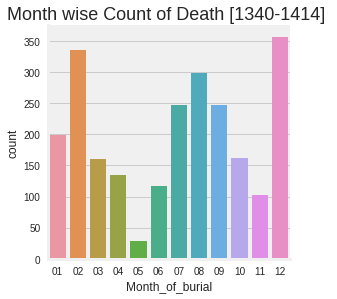

In [10]:

#Month_sns_plot
print("\nFirst Five months of Increased deaths")
monthwise_death = indata['Month_of_burial'].value_counts()
print(monthwise_death.head(5))
sns.factorplot("Month_of_burial", data=indata, kind="count")
plt.title("Month wise Count of Death [1340-1414] ", fontsize=18)

Text(0.5,1,'Month wise Count of Death')

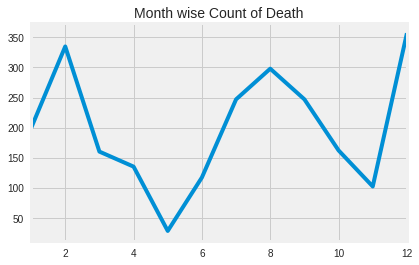

In [11]:

#Month_count
plt.figure()
dateCounts_df = indata["Month_of_burial"].value_counts()
dateCounts_df.index = dateCounts_df.index.astype(int)
dateCounts_df.sort_index().plot()
plt.title("Month wise Count of Death", fontsize=14)


First Five dates of Increased deaths
01    117
20    112
15    101
05     92
21     92
Name: Date_of_burial, dtype: int64


Text(0.5,1,'Date wise Count of Death [1340-1414 ')

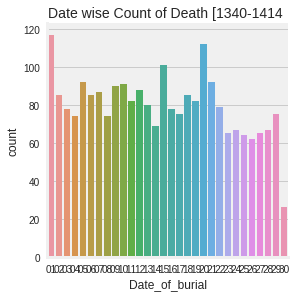

In [12]:

#Date_sns_plot
print("\nFirst Five dates of Increased deaths")
datewise_death = indata['Date_of_burial'].value_counts()
print(datewise_death.head(5))
sns.factorplot("Date_of_burial", data=indata, kind="count")
plt.title("Date wise Count of Death [1340-1414 ", fontsize=14)

Text(0.5,1,'Date wise Count of Death')

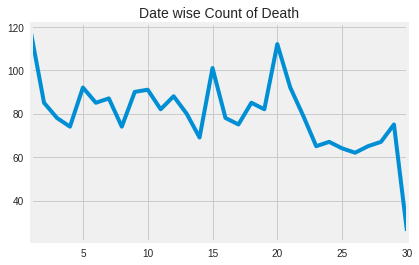

In [13]:
#Date_count
plt.figure()
dateCounts_df = indata["Date_of_burial"].value_counts()
dateCounts_df.index = dateCounts_df.index.astype(int)
dateCounts_df.sort_index().plot()
plt.title("Date wise Count of Death", fontsize=14)



First Five year of Increased deaths
1413    1491
1412     387
1414      75
1400      66
1403      36
Name: Year, dtype: int64


Text(0.5,1,'Year wise Count of Death [1340-1414] ')

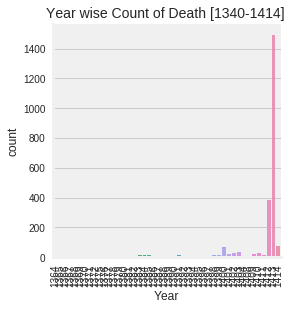

In [14]:

#Year_sns_plot
print("\nFirst Five year of Increased deaths")
yearwise_death = indata['Year'].value_counts()
print(yearwise_death.head(5))
g=sns.factorplot("Year", data=indata, kind="count")
g.set_xticklabels(rotation=90)
plt.title("Year wise Count of Death [1340-1414] ", fontsize=14)

Text(0.5,1,'Year wise Count of Death')

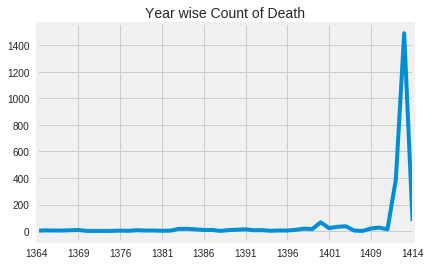

In [15]:
#year_count
plt.figure()
indata["Year"].value_counts().sort_index().plot()
plt.title("Year wise Count of Death", fontsize=14)

Text(0.5,1,'Gender wise Count of Death')

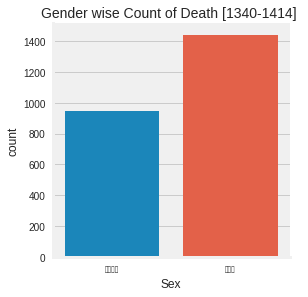

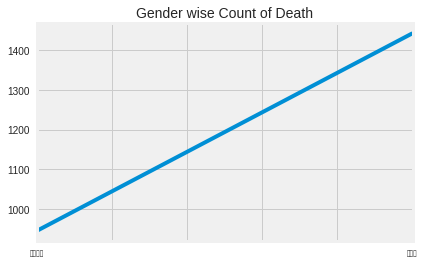

In [16]:

#sex_sns_plot
sns.factorplot("Sex", data=indata, kind="count")
plt.title("Gender wise Count of Death [1340-1414] ", fontsize=14)
#sex_count
plt.figure()
indata["Sex"].value_counts().sort_index().plot()
plt.title("Gender wise Count of Death", fontsize=14)

Text(0.5,1,'Nationality wise Count of Death [1340-1414] ')

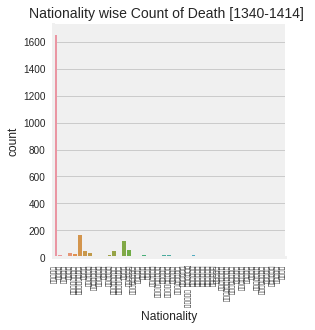

In [17]:
#Nationality_sns_plot
p=sns.factorplot("Nationality", data=indata, kind="count")
p.set_xticklabels(rotation=90)
plt.title("Nationality wise Count of Death [1340-1414] ", fontsize=14)

Text(0.5,1,'Nationality wise Count of Death')

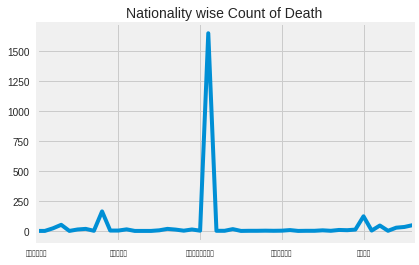

In [18]:

#sex_count
plt.figure()
indata["Nationality"].value_counts().sort_index().plot()
plt.title("Nationality wise Count of Death", fontsize=14)


First Five Age of Increased deaths
65 سنة     315
57 سنة     119
05 اشهر     98
04 اشهر     92
75 سنة      59
Name: Age, dtype: int64


Text(0.5,1,'Age wise Count of Death [1340-1414]')

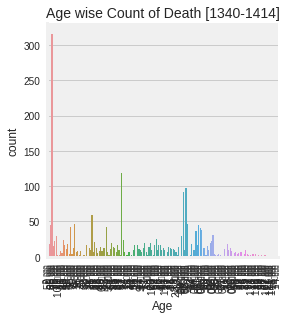

In [22]:


#AGE_sns_plot
print("\nFirst Five Age of Increased deaths")
agewise_death = indata['Age'].value_counts()
print(agewise_death.head(5))
q=sns.factorplot("Age", data=indata, kind="count")
q.set_xticklabels(rotation=90)
plt.title("Age wise Count of Death [1340-1414]", fontsize=14)

Text(0.5,1,'Age wise Count of Death')

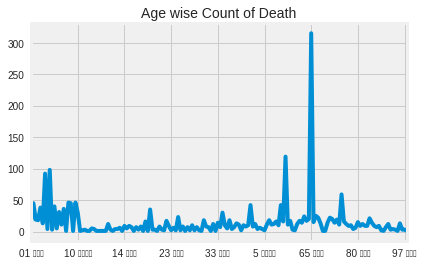

In [23]:

#sex_count
plt.figure()
indata["Age"].value_counts().sort_index().plot()
plt.title("Age wise Count of Death", fontsize=14)

Text(0.5,1,'Month and Gender wise Count of death [1340-1414] ')

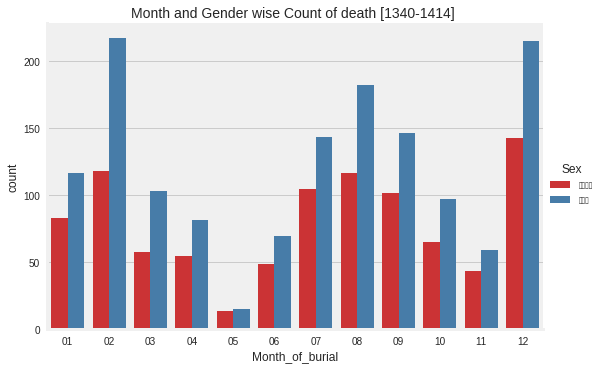

In [24]:

#Month and gender
h = sns.factorplot(x = 'Month_of_burial', hue='Sex', kind ='count', size = 5,aspect=1.5, data=indata, palette='Set1' )
plt.title("Month and Gender wise Count of death [1340-1414] ", fontsize=14)


Text(0.5,1,'Month and Age wise Count of death [1340-1414] ')

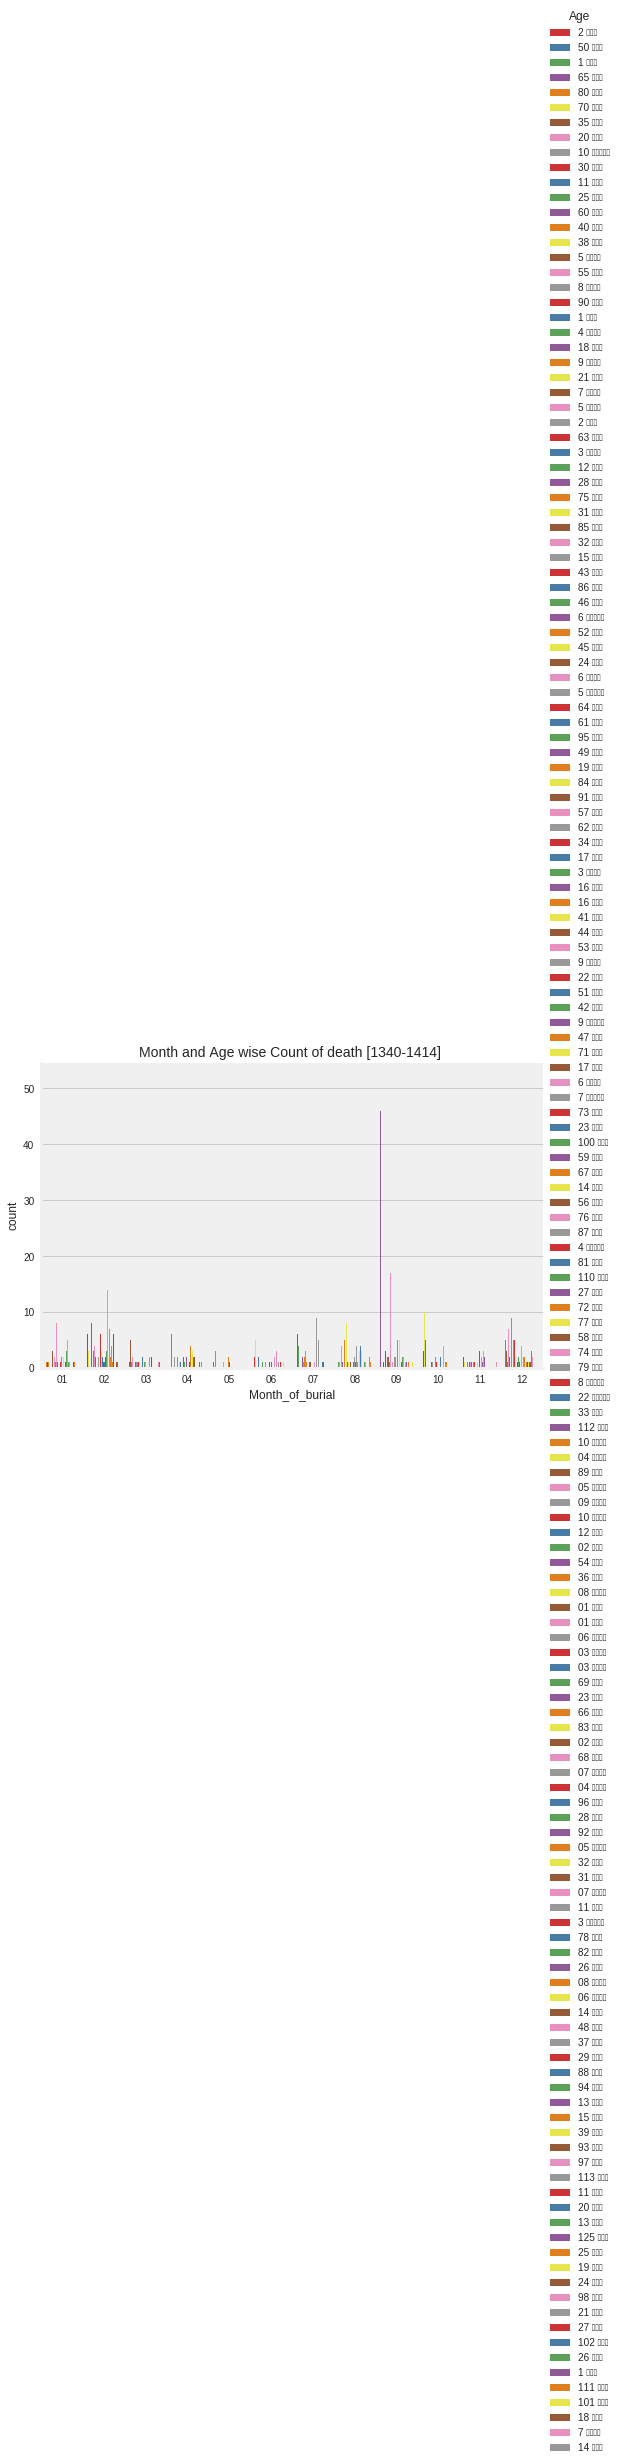

In [25]:

#Month and Age
h1 = sns.factorplot(x = 'Month_of_burial', hue='Age', kind ='count', size = 5,aspect=1.5, data=indata, palette='Set1' )
plt.title("Month and Age wise Count of death [1340-1414] ", fontsize=14)

In [26]:

print("Finally,From the plots,we clearly know that, There is no often deaths in 8th month(Shaban)")
#From the above analysis plots we clearly know that 1412 th year, 12 th month &Saudhi has most death counts data.
#Filtering
filtyob=indata['Year']==1412
filtnat=indata['Nationality']=='سعودي'
all_filt=filtyob+filtnat
print (indata[all_filt])

Finally,From the plots,we clearly know that, There is no often deaths in 8th month(Shaban)
                                                   Name   Sex Nationality  \
0     عيشه بنت محمد تكروني (javascript:__doPostBack(...  أنثى       سعودي   
1     عفيه بنت محمد (javascript:__doPostBack('ctl00$...  أنثى       سعودي   
2     منير بنت عوده (javascript:__doPostBack('ctl00$...  أنثى       سعودي   
3     زهره علي بادري (javascript:__doPostBack('ctl00...  أنثى       سعودي   
4     زينب بنت عقل سي (javascript:__doPostBack('ctl0...  أنثى       سعودي   
6     زينب غلام محي الدين صاحب (javascript:__doPostB...   ذكر       سعودي   
7     حمزه بنت موسى عبدالرحيم (javascript:__doPostBa...  أنثى       سعودي   
8     فوزيه بنت عبدالله (javascript:__doPostBack('ct...  أنثى       سعودي   
9     حسنه سعيد بن سعيد (javascript:__doPostBack('ct...  أنثى       سعودي   
10    محمد طلقت أحمد رجب (javascript:__doPostBack('c...   ذكر       سعودي   
11    نوال السيد عبدالرحمن طه (javascript:__doPostBa...   ذكر 

/home/yasser/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


In [27]:
filtnat.head(10)

0     True
1     True
2     True
3     True
4     True
5    False
6     True
7     True
8     True
9     True
Name: Nationality, dtype: bool

# 4. Summarize your results


Text(0.5,1,'Month and Gender wise Death counts in saudi at 12th month 1412 ')

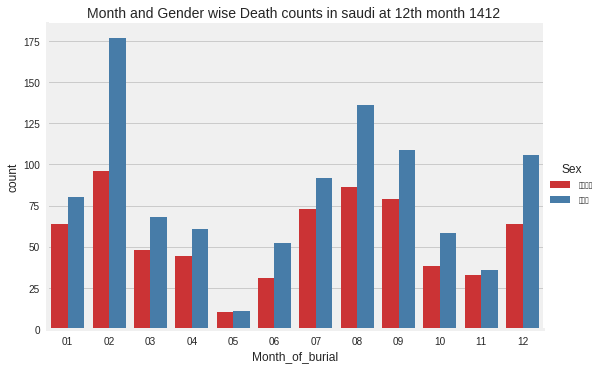

In [28]:

#filtered month and gender
h2 = sns.factorplot(x = 'Month_of_burial', hue='Sex', kind ='count', size = 5,aspect=1.5, data=indata[all_filt], palette='Set1' )
plt.title("Month and Gender wise Death counts in saudi at 12th month 1412 ", fontsize=14)


From the plots we clearly understand that there is no often deaths in the month of Shaban

# 5. List any resource you used



[Table Capture](https://chrome.google.com/webstore/detail/table-capture/iebpjdmgckacbodjpijphcplhebcmeop)

[web scraper](https://chrome.google.com/webstore/detail/web-scraper/jnhgnonknehpejjnehehllkliplmbmhn?hl=en)

[Medina Municipality](https://services.amana-md.gov.sa/eservicesite/Inq/DeathInquiry.aspx) 

# 6. Future work and suggestions:

- Scraping by python (Selinum and BeautifulSoup or other packages) is a must to collect more reliable date from 1430+ years as the records are getting bigger.

- [Deaths registered monthly in England and Wales](https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/monthlyfiguresondeathsregisteredbyareaofusualresidence) or [national records of Scotland](https://www.nrscotland.gov.uk/statistics-and-data/statistics/statistics-by-theme/vital-events/general-publications/weekly-and-monthly-data-on-births-and-deaths/monthly-data-on-births-and-deaths-registered-in-scotland) can be used to compare Non muslim population with the current data set. 

- I found some other good resourcess can be also used for comparssion such as:
[United Nations Statistics Division](http://data.un.org/Data.aspx?d=POP&f=tableCode%3A65) or [national records of Scotland](https://www.nrscotland.gov.uk/statistics-and-data/statistics/statistics-by-theme/vital-events/general-publications/weekly-and-monthly-data-on-births-and-deaths/monthly-data-on-births-and-deaths-registered-in-scotland)

However, date conversion between Gregorian dates and other calendar systems is important to check the month of Shaban and study other months to check if there is any trends...

Date conversion can be done using [Excel](https://www.excelforum.com/excel-general/791099-convert-from-hijri-date-to-gregorian.html) or [python](https://pypi.org/project/convertdate/)